### А/Б-тестирование с помощью Python.

In [1]:
import sys
sys.version

'3.9.6 (default, Nov 10 2023, 13:38:27) \n[Clang 15.0.0 (clang-1500.1.0.2.5)]'

In [2]:
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://www.numpy.org/
import scipy as sc #https://www.scipy.org/

import matplotlib.pyplot as plt #https://matplotlib.org/
import seaborn as sns #https://seaborn.pydata.org/
import plotly #https://plot.ly/

%matplotlib inline 

import warnings
warnings.simplefilter('ignore') #Здесь мы будем игнорировать предупреждения о грядущих изменениях вызовов sc.stats и прочего

**_Статистическая гипотеза (statistical hypothesys)_** — это определённое предположение о распределении вероятностей, лежащем в основе наблюдаемой выборки данных.

**_Проверка статистической гипотезы (testing statistical hypotheses)_** — это процесс принятия решения о том, противоречит ли рассматриваемая статистическая гипотеза наблюдаемой выборке данных.

**_Статистический тест или статистический критерий_** — строгое математическое правило, по которому принимается или отвергается статистическая гипотеза. 

**$H_0$** -- основная гипотеза  
**$H_1$** -- альтернативная гипотеза (может быть "не $H_0$")

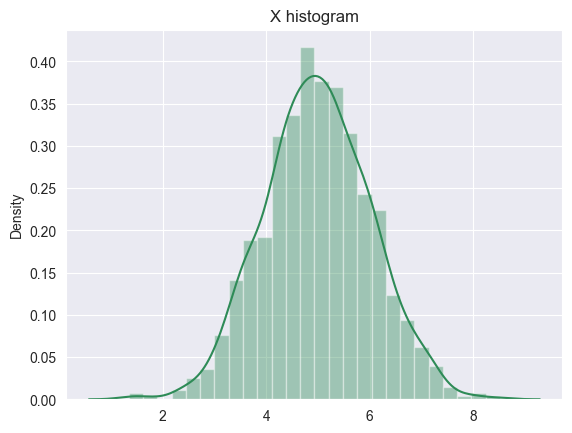

In [3]:
N = 1000
X = np.random.normal(5, 1, N)
sns.distplot(X[:], color='seagreen')
plt.title('X histogram')

plt.show()

Пример простой гипотезы. Известно, что X имеет распределение $~\mathcal{N}(\mu, 1)$.  
**$H_0$**: $\mu = 1$  
**$H_1$**: $\mu \ne 1$  

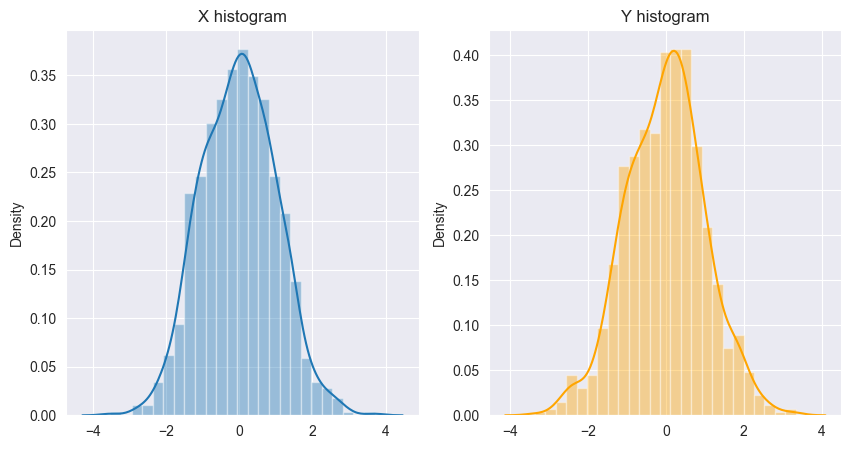

In [4]:
#Сгенерируем по 1000 образцов из стандартного нормального распределения, нарисуем их гистограммы
N = 1000
X = np.random.normal(0, 1, (N))
Y = np.random.normal(0, 1, (N))

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
sns.distplot(X)
plt.title('X histogram')

plt.subplot(1, 2, 2)
sns.distplot(Y, color='orange')
plt.title('Y histogram')

plt.show()

Пример более реальной гипотезы в тестировании:  
**$H_0$** -- выборки X и Y принадлежат нормальному распределению с одинаковыми математическим ожиданием и дисперсией.  
**$H_1$** -- выборки X и Y принадлежат к различным распределениям (возможно, различным только по параметрам/моментам), отрицание нулевой гипотезы.

In [5]:
#Выборочное среднее:
X_ = X.sum()/N
print('Выборочное среднее для X: {:.2}'.format(X_))
Y_ = Y.sum()/N
print('Выборочное среднее для Y: {:.2}'.format(Y_))

Выборочное среднее для X: -0.013
Выборочное среднее для Y: -0.0096


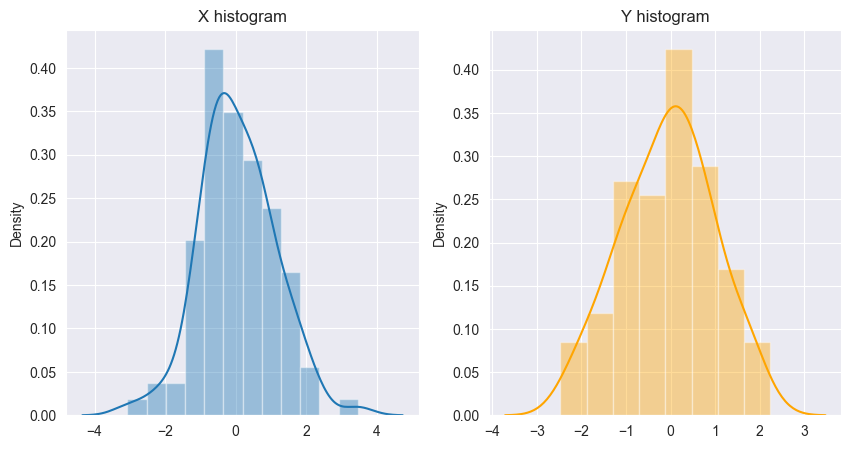

In [6]:
#Сгенерируем по 1000 образцов из стандартного нормального распределения, нарисуем их гистограммы
N = 100
X = np.random.normal(0, 1, (N))
Y = np.random.normal(0, 1, (N))

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
sns.distplot(X)
plt.title('X histogram')

plt.subplot(1, 2, 2)
sns.distplot(Y, color='orange')
plt.title('Y histogram')

plt.show()

In [7]:
#Выборочное среднее:
X_ = X.sum()/N
print('Выборочное среднее для X: {:.2}'.format(X_))
Y_ = Y.sum()/N
print('Выборочное среднее для Y: {:.2}'.format(Y_))

Выборочное среднее для X: 0.06
Выборочное среднее для Y: -0.064


<tbody><tr>
<th colspan="2" rowspan="2">&nbsp;
</th>
<th colspan="2">Верная гипотеза
</th></tr>
<tr>
<th>$H_0$
</th>
<th>$H_1$
 </th></tr>
<tr>
<th rowspan="2">Результат<br>применения<br>критерия
</th>
<th>$H_0$
</th>
<td>
  верно принята
</td>
<td> неверно принята<br>(Ошибка <i>второго</i> рода)
</td></tr>
<tr>
<th>$H_1$
</th>
<td>
  неверно отвергнута<br>(Ошибка <i>первого</i> рода)
</td>
<td>
  верно отвергнута
</td></tr></tbody>

**_Уровень значимости_** = вероятность ошибки первого рода, $\alpha$, $\alpha$-value  
**_Мощность критерия_** = (1 - вероятность ошибки второго рода),  $(1-\beta )$

**_Домашнее задание_**  
Представтье, что вы продаёте чайники в интернете. Представим, что мы тестируем новую функциональность сайта, которая, предполагается, будет увеличивать продажи/выручку в день. Мы разделили всех пользователей случайным образом на две независимых группы, одной из них показываем старую функциональность, а другой новую. Проводим тест один месяц.    
1. Сгенерируйте две искусственных выборки, которые могли бы отражать характеристики продаж чайников (количество продаж в день, сумма продаж в день, что-нибудь ещё) в обеих группах.  
2. Визуализируйте эти данные. Постройте гистограммы, посчитайте описательные статистики с помощью таких функций, как: np.mean(), np.std(), np.median(), sc.stats.mode().
3. Попробуйте сформулировать разные гипотезы **$H_0$** и **$H_1$**.

In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)

sales_day_1 = np.random.normal(loc=100, scale=20, size=1000)
revenue_day_1 = sales_day_1 * np.random.uniform(30, 40, size=1000)

sales_day_2 = np.random.normal(loc=110, scale=25, size=1000)
revenue_day_2 = sales_day_2 * np.random.uniform(35, 45, size=1000)


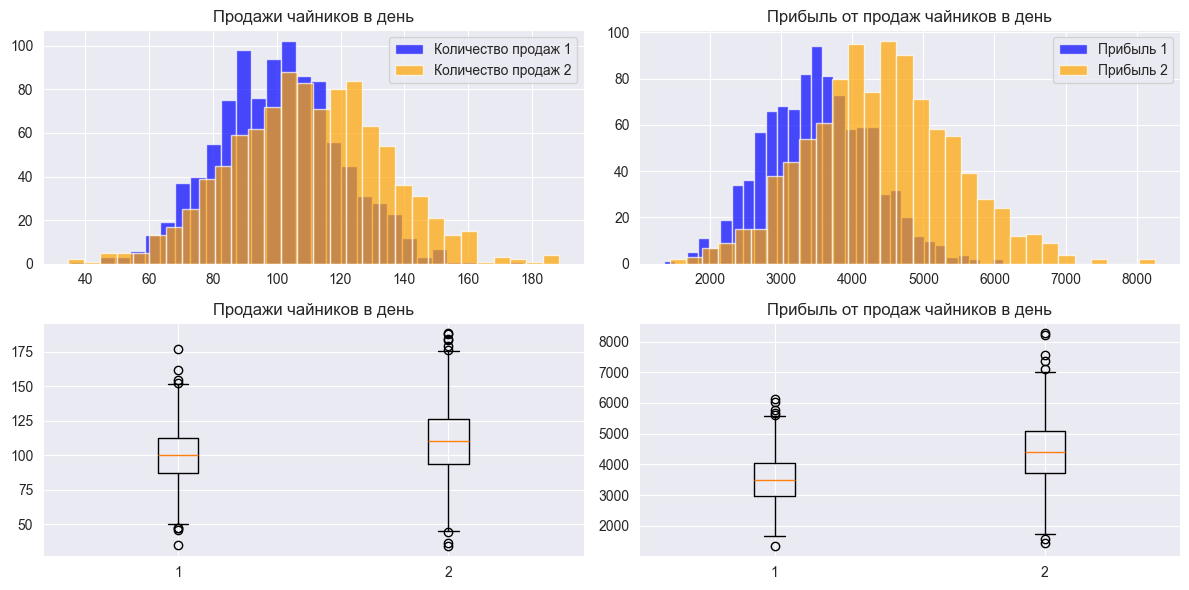

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(sales_day_1, bins=30, color='blue', alpha=0.7, label='Количество продаж 1')
plt.hist(sales_day_2, bins=30, color='orange', alpha=0.7, label='Количество продаж 2')
plt.title('Продажи чайников в день')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(revenue_day_1, bins=30, color='blue', alpha=0.7, label='Прибыль 1')
plt.hist(revenue_day_2, bins=30, color='orange', alpha=0.7, label='Прибыль 2')
plt.title('Прибыль от продаж чайников в день')
plt.legend()

plt.subplot(2, 2, 3)
plt.boxplot([sales_day_1, sales_day_2], labels=['1', '2'])
plt.title('Продажи чайников в день')

plt.subplot(2, 2, 4)
plt.boxplot([revenue_day_1, revenue_day_2], labels=['1', '2'])
plt.title('Прибыль от продаж чайников в день')

plt.tight_layout()
plt.show()


In [25]:
print("1:")
print("Среднее количество продаж:", np.mean(sales_day_1))
print("Стандартное отклонение продаж:", np.std(sales_day_1))
print("Медиана продаж:", np.median(sales_day_1))
print("Мода продаж:", stats.mode(sales_day_1).mode)

print("\n2:")
print("Среднее количество продаж:", np.mean(sales_day_2))
print("Стандартное отклонение продаж:", np.std(sales_day_2))
print("Медиана продаж:", np.median(sales_day_2))
print("Мода продаж:", stats.mode(sales_day_2).mode)


1:
Среднее количество продаж: 100.38664111644651
Стандартное отклонение продаж: 19.574524154947085
Медиана продаж: 100.50601224469776
Мода продаж: 35.17465319861854

2:
Среднее количество продаж: 110.3642386248424
Стандартное отклонение продаж: 24.211390024888452
Медиана продаж: 110.17328753985217
Мода продаж: 34.51219610447937
